# 2회 기출동형 모의고사

## 1. 데이터 탐색

#### (1) 시각화 포함 탐색적 자료분석을 시행하시오(EDA)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data1/diabetes_for_test.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0.5, 0.98, 'EDA')

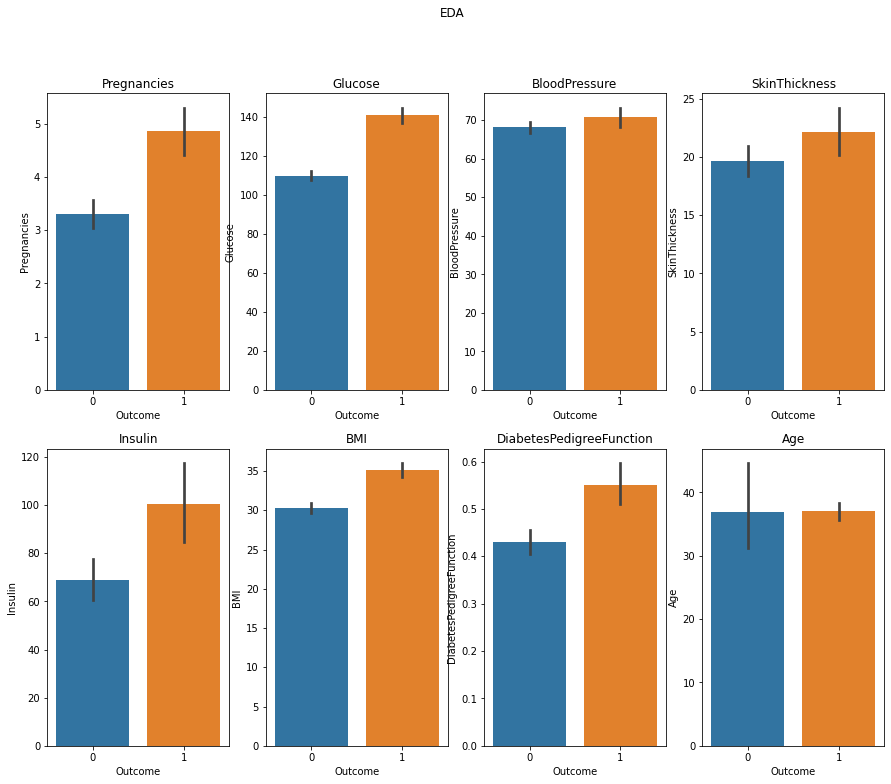

In [10]:
fig, axes = plt.subplots(2,4,figsize=(15,12))

for i in range(4):
    sns.barplot(df.Outcome,df.iloc[:,i], ax =axes[0][i] )
    axes[0][i].set_title(df.columns[i])
    
for i in range(4):
    sns.barplot(df.Outcome, df.iloc[:,i+4],ax=axes[1][i])
    axes[1][i].set_title(df.columns[i+4])
plt.suptitle('EDA')

In [5]:
# EDA 해석
# 당뇨병이 있는 사람은 없는 사람보다 pregnancies 평균 수치가 높다
# 당뇨병이 있는 사람은 없는 사람보다 Glucose의 평균 수치가 높다
# 당뇨병이 있는 사람은 없는 사람보다 Insulin 평균 수치가 높다
# 당뇨병이 있는 사람은 없는 사람보다 BMI 평균 수치가 높다

RangeIndex(start=0, stop=768, step=1)

<AxesSubplot:>

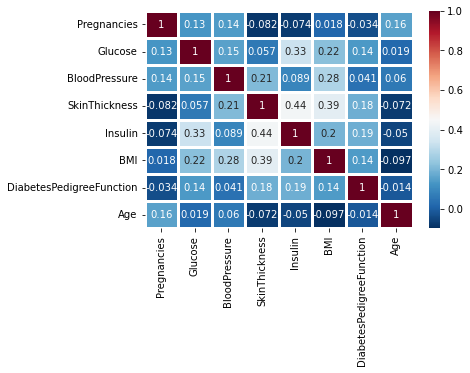

In [12]:
df_cor = df.drop(columns=['Outcome']).corr(method='pearson')
sns.heatmap(df_cor,
           xticklabels = df_cor.columns,
           yticklabels = df_cor.columns,
           cmap='RdBu_r',
           annot= True,
           linewidth=3)
# 0.9 이상의 상관관계를 가지는 변수는 없으므로 모든 변수를 사용하여 모델링해도 될 것으로 판단된다.

#### (2) 이상치를 식별하고 처리하시오.

In [13]:
df.info()
# info로 변수들을 보았을 때 결측치는 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# boxplot을 이용한 이상치 식별
df1 = pd.melt(df.drop(columns=['Outcome']), var_name='col',value_name='value')
df1

,col,value
0,Pregnancies,6.0
1,Pregnancies,1.0
2,Pregnancies,8.0
3,Pregnancies,1.0
4,Pregnancies,0.0
...,...,...
6139,Age,63.0
6140,Age,27.0
6141,Age,30.0
6142,Age,47.0


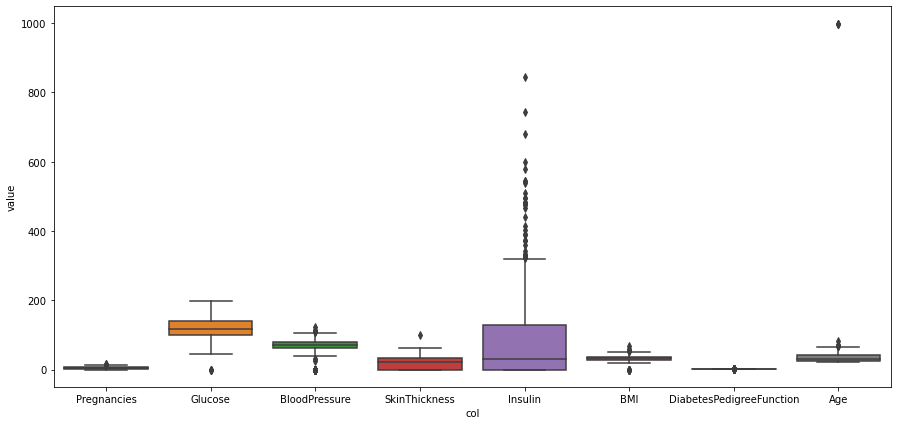

In [23]:
plt.figure(figsize=(15,7))
sns.boxplot(x='col',y='value',data=df1)
plt.xticks(range(8),df.drop(columns=['Outcome']).columns)
plt.show()

Text(0.5, 0.98, 'EDA')

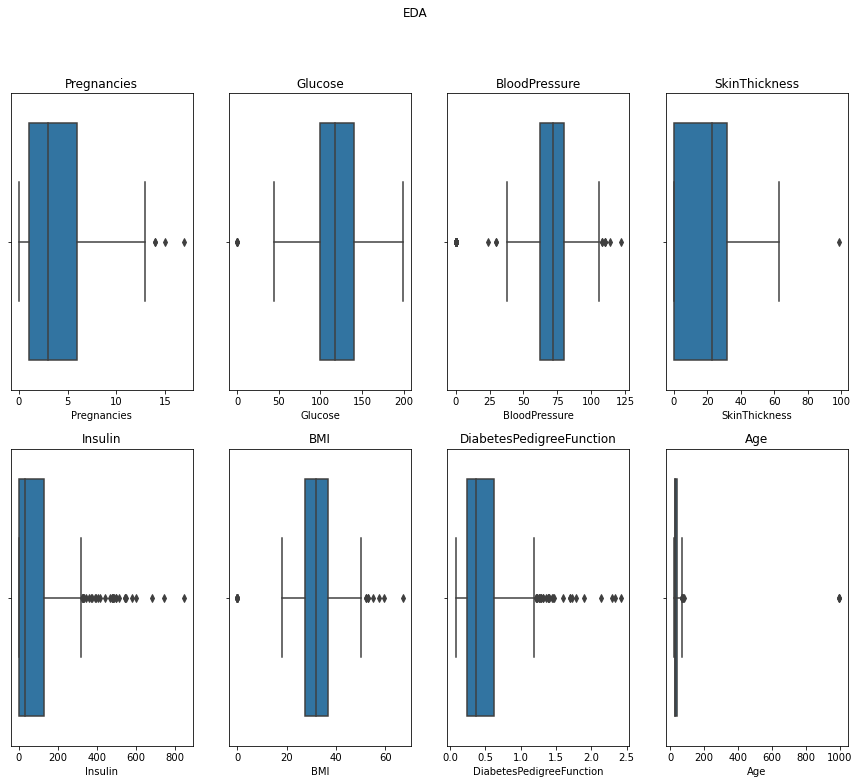

In [21]:
fig, axes = plt.subplots(2,4,figsize=(15,12))

for i in range(4):
    sns.boxplot(df.columns[i], ax =axes[0][i],data=df )
    axes[0][i].set_title(df.columns[i])
    
for i in range(4):
    sns.boxplot(df.columns[i+4], ax =axes[1][i],data=df)
    axes[1][i].set_title(df.columns[i+4])
plt.suptitle('EDA')

# boxplot 시각화 결과 Age의 변수의 경우 중앙값과 멀리 떨어진 이상치를 발견했다.
# 인슐린 수치의 경우 이상치들이 연속적으로 이어져있어 실제로 이상치를 가진 사람이 있을 수 있다고 판단
# 따라서 age 변수의 이상치만을 처리

In [27]:
# 추가적으로 Glucose와 BloodPressure의 컬럼에는 0이 존재하지 않아야 된다고 판단, 이를 이상치라고 판단하고 중앙값으로 대체
outlier_index = df[df['Age']>400].index
df.loc[outlier_index,'Age'] = df.Age.median()
outlier_index = df[df['BloodPressure']==0].index
df.loc[outlier_index,'BloodPressure'] = df.BloodPressure.median()
outlier_index = df[df['Glucose']==0].index
df.loc[outlier_index,'Glucose'] = df.Glucose.median()


In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,31.992578,0.471876,33.191406,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,7.884160,0.331329,11.683509,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### (3) 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.
답: describe 함수로 보게되면, 최솟값과 최댓값의 차이가 많이 나는 컬럼이 존재하므로 선형 모델 사용시 scale의 적용이 필요하다고 판단된다.

## 2. 클래스 불균형 처리

#### (1) 업 샘플링 과정을 설명하고 결과를 작성하시오.

#### 오버 샘플링 기법은 비중이 적은 데이터를 추가로 생성해 데이터 불균형을 극복하는 방식이다. 소수 레이블 가진 데이터를 다수 레이블을 가진 데이터 수만큼 증식시켜 학습에 충분한 데이터를 확보하는 기법이다. 언더 샘플링은 데이터의 손실이 발생하므로 일반적으로 불균형한 데이터를 처리하는 방식으로 오버 샘플링을 사용한다.

##### 1. random oversampling
1. 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식시킨다.
2. 데이터를 단순 복제하므로 소수 클래수의 과적합이 발생한다는 단점이 있지만 사용이 편리하다는 장점이 있다.

##### 2. SMOTE
1. 적은 데이터세트에 있는 개별 데이터들의 k-최근접 이웃을 찾아, 해당 데이터와 k개의 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간 차이를 지닌 새로운 데이터를 생성하낟.
2. random sampling 방식보다 느리다는 단점이 있지만, 데이터를 단순히 동일하게 증식시키는 방식이 아니기 때문에, 과적합 문제를 예방할 수 있다는 장점이 있다.


In [32]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(['Outcome'],axis=1)
y = df[['Outcome']]

ros = RandomOverSampler()
X_upsampling, y_upsampling = ros.fit_resample(X,y)

print('기존의 타깃 분포')
print(df['Outcome'].value_counts()/len(df))
print('샘플링 후 타깃 분포')
print(y_upsampling['Outcome'].value_counts()/len(y_upsampling))

기존의 타깃 분포
0    0.651042
1    0.348958
Name: Outcome, dtype: float64
샘플링 후 타깃 분포
1    0.5
0    0.5
Name: Outcome, dtype: float64


#### (2) 언더 샘플링 과정을 설명하고 결과를 작성하시오.
##### 언더 샘플링은 다수 클래스 를 감소시켜 소수 클래스 개수에 맞추는 방식으로 , 대표적으로 random으로 다수의 클래스 데이터를 선택하여 삭제하는 RandomUnderSample, 서로 다른 클래스가 있을 때 서로 다른 클래스에 가장 가까운 데이터들이 토멕 링크로 묶여서 토멕 링크 중 다수 클래스의 데이터를 제거하는  Tomek link 방식이 있다.

In [33]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_undersampling, y_undersampling = rus.fit_resample(X,y)

print('기존의 타깃 분포')
print(df['Outcome'].value_counts()/len(df))
print('샘플링 후 타깃 분포')
print(y_undersampling['Outcome'].value_counts()/len(y_undersampling))

기존의 타깃 분포
0    0.651042
1    0.348958
Name: Outcome, dtype: float64
샘플링 후 타깃 분포
0    0.5
1    0.5
Name: Outcome, dtype: float64


#### (3) 둘 중 하나를 선택하고 선택한 이유를 서술하시오.
답: Oversampling이 적합한다. 이유는 해당 데이터는 총 768개로 당뇨병 환자를 대표하기는 적은 data이다. 언더 샘플링 기법응 사용하면 데이터가 훨씬 적어지기 때문에 과적합의 문제가 발생할 수 있다. 따라서 오버 샘플링을 선택하였다.

## 3. 모델링
#### (1) 당뇨병 환자를 예측하는 최속 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 제시하시오

In [36]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

lr = LogisticRegression(random_state=0)
xgb = XGBClassifier(random_state=0)
svm = SVC(kernel = 'linear')

In [ ]:
# 속도 측면 LogisticRegression, 정확도 측면 SVC 모델을 제시한다.

#### (2) 모델을 비교하고 결과를 설명하시오.

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

## 5개의 경우의 수로 분할하여 검증
kfold = KFold()
def model_result(model):
    pred_li = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index,:],y.iloc[test_index,:]
        
        X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
        
        start = time.time()
        model.fit(X_train_resample, y_train_resample)
        end = time.time()
        
        pred = model.predict(X_test)
        pred_li.append(accuracy_score(pred,y_test['Outcome']))
        
    ## 마직막 데이터 학습 속도
    print(f"{end- start:.5f} sec" )
    ## 5개의 train 데이터에 대한 정확도의 평균 값 
    print(np.mean(pred_li))

In [39]:
model_result(lr)

0.03092 sec
0.7422544775485951


In [41]:
model_result(xgb)

0.14860 sec
0.7474492827434004


In [43]:
model_result(svm)

3.32990 sec
0.7605126899244546


#### (3) 속도 개선을 위한 차원축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오.

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify =y, test_size = 0.3, random_state=1)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
pca = PCA(n_components=8)
X_train_pca = pca.fit(X_train_s)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:5].sum())

# 5주성분가지 사용하면 전체 데이터에 81%를 설명할 수 있음을 파악했다.

[0.25670287 0.22751974 0.12021414 0.11322506 0.10267202 0.07829116
 0.05298129 0.04839372]
0.8203338350900691


In [52]:
def pca_model_result(model):
    pred_li= []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index,:], y.iloc[test_index,:]
        
        X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
        
        scaler = StandardScaler()
        X_train_res_s = scaler.fit_transform(X_train_resample)
        X_test_s = scaler.transform(X_test)
        
        pca = PCA(n_components=5)
        X_train_pca = pca.fit_transform(X_train_res_s)
        X_test_pca = pca.transform(X_test_s)
        
        start = time.time()
        model.fit(X_train_pca, y_train_resample)
        end = time.time()
        
        pred = model.predict(X_test_pca)
        pred_li.append(accuracy_score(pred, y_test['Outcome']))
        
    print(f"{end -start:.5f} sec")
    print(np.mean(pred_li))

In [54]:
pca_model_result(lr)

0.00499 sec
0.7279093455564045


In [55]:
pca_model_result(xgb)

0.12816 sec
0.7031491384432561


In [58]:
pca_model_result(svm)

0.02992 sec
0.7253034547152193


In [ ]:
# 예측 성능은 떨어졌지만 속도 측면에서 차원축소에 의해 빨라졌다.

# 통계분석

### 1. 회사제품의 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속 함유량이 차이가 난다고 제보를 받았다. 해당 금속 함유량 데이터에 대한 검정을 수행하시오(유의확률: 0.05)

#### (1) 귀무가설과 대립가설을 작성하시오.
- 귀무가설: 제품들의 금속 함유량 분산은 1.3이다.
- 대립가설: 제품들의 금속 함유량 분산은 1.3이 아니다.

#### (2) 가설을 양측 검정하시오.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data1/metalicity')
df

,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529
...,...
145,45.915727
146,45.277868
147,45.082157
148,44.297235


In [6]:
df['metalicity'].mean()

45.26662991017956

In [4]:
# 정규성 검정
import scipy.stats as stats
from scipy.stats import shapiro
shapiro(df['metalicity'])
# 검정결과 p-valuerk 0.05보다 크므로 귀무가설을 기각하지 못한다. 즉, 해당 데이터는 정규성을 만족한다고 할 수 있다.

ShapiroResult(statistic=0.9822470545768738, pvalue=0.050023749470710754)

In [7]:
## 정규분포이며, 해당 데이터의 평균을 갖고 분산이 1.3인 150행의 데이터를 만들고 등분산 검정을 진행
test = np.random.normal(45.26, 1.3*0.5, 150)
test

array([45.77305822, 45.49512653, 45.67114598, 44.33041174, 45.02838296,
       44.83143125, 45.87411295, 47.02960303, 42.87652161, 44.17420687,
       45.2276495 , 45.07657045, 44.92767982, 46.61116727, 45.13775699,
       44.71821055, 45.4055422 , 45.96545406, 44.5511964 , 45.70182616,
       44.92220878, 44.57723308, 44.68008083, 46.40009495, 45.16891323,
       44.36457707, 45.20924817, 45.26179521, 45.30616228, 45.73996459,
       45.52964711, 43.26690874, 44.79056261, 44.69217912, 43.69956976,
       45.80851194, 44.67176864, 45.66428094, 45.77556647, 44.03256885,
       45.81740454, 46.00178059, 46.24698151, 45.30326548, 44.75148948,
       45.45937376, 46.12402852, 45.85925454, 45.53079215, 45.39769977,
       46.03151358, 43.74116372, 44.56703045, 44.91283001, 45.29398109,
       44.44431564, 45.58010878, 45.46540213, 44.96657936, 45.64515921,
       45.33256258, 45.40990952, 45.05922535, 44.6506315 , 45.87105836,
       44.25381155, 45.28946739, 46.05592499, 44.86803513, 45.74

In [8]:
stats.levene(df['metalicity'],test)
# 등분산 검정 결과 p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉, 제품들의 금속 재질 함유 분산은 1.3이 아니다.

LeveneResult(statistic=9.180270402557081, pvalue=0.002660811785980603)

### 2. 제품 200개의 Lot별 불량 제품 수량 데이터에 대해 p관리도를 구하고 시각화 하시오.

#### (1) p관리도에 따라 관리중신선, 관리 상한선, 하한선을 구하시오.

- n: lot별 생산수량
- p: lot 별 불량율
- 관리중심선: 전체 불량수량/ 전체 생산수량
- 관리 상하한선: p+-3*((p(1-p)/n)*0.5)

In [9]:
df2 = pd.read_csv('./data1/lot_quality.csv')
df2

,lot,생산수량,불량수량
0,1,587,19
1,2,588,15
2,3,455,19
3,4,666,12
4,5,750,15
...,...,...,...
195,196,631,18
196,197,565,21
197,198,570,12
198,199,517,10


In [10]:
df2['p'] = df2['불량수량']/df2['생산수량']
df2['관리상한선'] = df2['p'] + 3* ((df2['p']*(1-df2['p']) / df2['생산수량'])**0.5)
df2['관리하한선'] = df2['p'] - 3* ((df2['p']*(1-df2['p']) / df2['생산수량'])**0.5)

# 관리 중신선: 전체 불량 비율
CL = df2['불량수량'].sum()/df2['생산수량'].sum()
print('관리중심선: ', CL)

df2

관리중심선:  0.029024320840935338


,lot,생산수량,불량수량,p,관리상한선,관리하한선
0,1,587,19,0.032368,0.054282,0.010454
1,2,588,15,0.025510,0.045017,0.006004
2,3,455,19,0.041758,0.069892,0.013625
3,4,666,12,0.018018,0.033481,0.002555
4,5,750,15,0.020000,0.035336,0.004664
...,...,...,...,...,...,...
195,196,631,18,0.028526,0.048407,0.008645
196,197,565,21,0.037168,0.061044,0.013292
197,198,570,12,0.021053,0.039092,0.003013
198,199,517,10,0.019342,0.037514,0.001171


#### (2) 관리도를 시각화하시오.

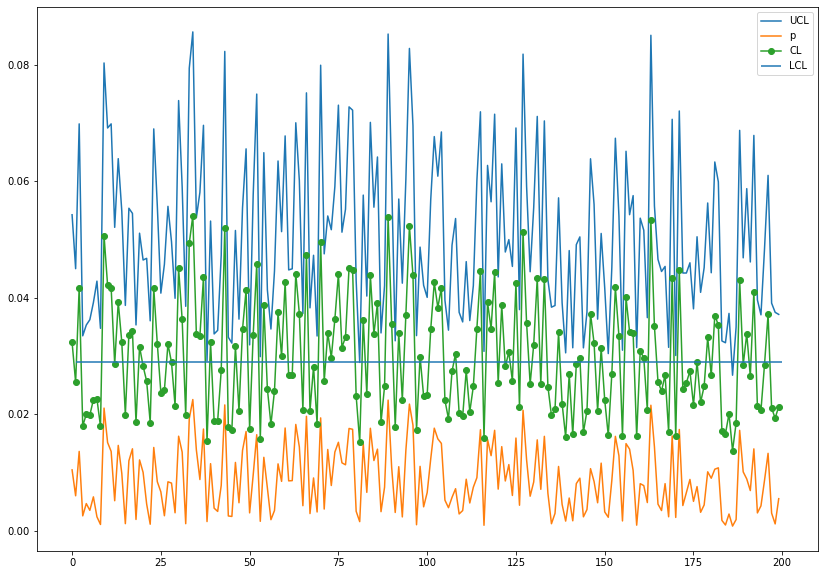

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.plot(df2['관리상한선'])
plt.plot(df2['관리하한선'])
plt.plot(df2['p'], marker='o')
plt.hlines(CL,1,200)
plt.legend(['UCL','p','CL','LCL'])
plt.show()

### 3. 제품 1, 2를 만드는 데 재료 a,b,c가 일부 사용되며 제품 1과 2를 만들 때 12만원과 18만원을 벌 수 있다. 재료는 한정적으로 주어지는데, 이때 최대 수익을 낼 수 있을 때의 제품 1과 제품 2의 개수를 구하라.

In [28]:
# 제품 1 = x , 제품 2 = y
# 원재료로 y만 생산했을 때 32개를 만들 수 있다.
# 이때 남은 재료는 a: 20, b: 40, c: 240

x = 0
y = 32
max_profit = 32 * 18
a = 20
b = 40 
c = 240

while (a>0) or (b>0) or (c>0):
    y = y-1
    a = a+40
    b = b+30
    c = c +30
    while (a>=20) and (b>=20) and (c>=20):
        x = x+1
        a = a-20
        b = b-20
        c = c-20
        if(y*18 + x* 12) > max_profit:
            max_profit = (y*18 + x*12)
            x_count = x
            y_count = y
    if y ==0:
        break
print("최대 수익: ", max_profit)
print('제품 1 수량: ', x_count)
print('제품 2 수량: ', y_count)

최대 수익:  600
제품 1 수량:  5
제품 2 수량:  30


### 4. 상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다.
[a,a,b,b,a,a,a,a,b,b,b,b,b,a,a,b,b,a,b,b]

##### (1) 구매 패턴으로 볼 때 두 상품이 연관이 있는지 가설을 세우고 검정하시오.

- 귀무가설: 연속적인 관측값은 임의적이다.
- 대립가설: 연속적인 관측값은 임의적이 아니다.

In [29]:
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame(data, columns=['product'])
test_df

,product
0,a
1,a
2,b
3,b
4,a
5,a
6,a
7,a
8,b
9,b


In [32]:
from statsmodels.sandbox.stats.runs import runstest_1samp

# 데이터 변환 
test_df['product'] = test_df['product'].map({'a':1,"b":0})
test_df['product']

0     1
1     1
2     0
3     0
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    1
14    1
15    0
16    0
17    1
18    0
19    0
Name: product, dtype: int64

In [33]:
runstest_1samp(test_df['product'],cutoff=0.5,correction=True)

(-1.1144881152070183, 0.26506984027306035)

#### (2) 가설을 채택하시오. 
- 검정 결과 p-value가 0.05보다 크므로 귀무가설을 기각할 수 없다.
- 즉, 상품 a와b의 구매에는 연관이 없다.